In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv(r"D:\Downloads\timesData.csv")
df.dropna(inplace = True) #removes rows with empty data
df = df.drop_duplicates() #removes dupes
df.head()


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011


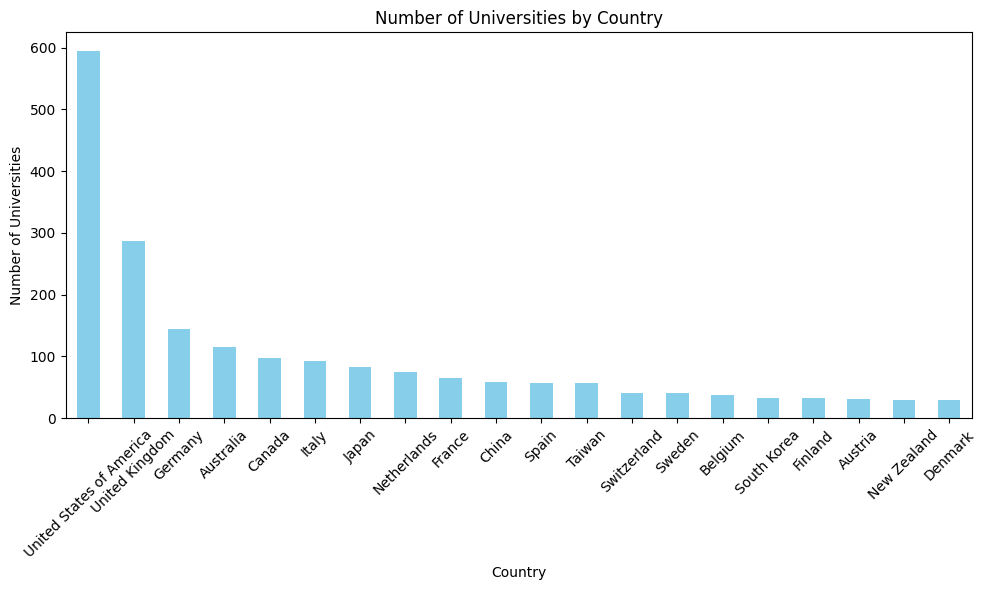

In [11]:

df['country'] = df['country'].replace('Unisted States of America', 'United States of America') #replaces misspelling

country_counts = df['country'].value_counts()
country_counts = country_counts.sort_values(ascending=False)
top_20_countries = country_counts.head(20) #only plots top 20 countries

plt.figure(figsize=(10,6))
top_20_countries.plot(kind='bar', color='skyblue')

plt.title('Number of Universities by Country')
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation between Teaching Quality and Intl. Students ratio

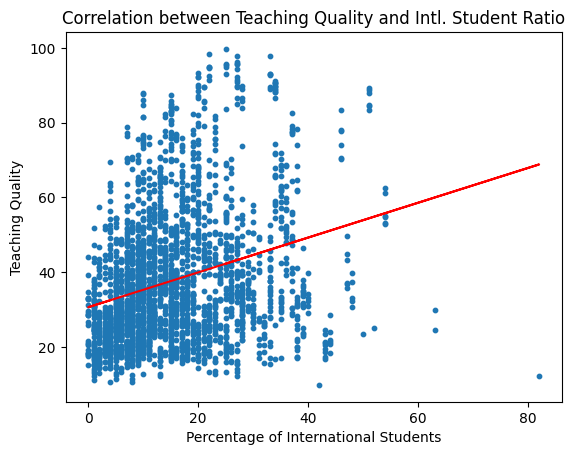

0.2786633072429509


In [7]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv(r"D:\Downloads\timesData.csv")

# Clean 'international_students' column (remove %, convert to numeric)
df['international_students'] = (
    df['international_students']
    .astype(str)
    .str.replace('%', '', regex=False)
)
df['international_students'] = pd.to_numeric(df['international_students'], errors='coerce')

# Ensure 'teaching' is numeric
df['teaching'] = pd.to_numeric(df['teaching'], errors='coerce')

# Drop NaNs in required columns
df = df.dropna(subset=['teaching', 'international_students'])

# Drop duplicate rows
df = df.drop_duplicates()

# Check if enough unique data points for regression
if df['teaching'].nunique() < 2 or df['international_students'].nunique() < 2:
    print("Not enough unique data for regression.")
else:
    # Prepare variables
    x = df['international_students']
    y = df['teaching']

    # Run linear regression
    slope, intercept, r, p, std_err = stats.linregress(x, y)

    # Regression function
    def myfunc(x_val):
        return slope * x_val + intercept

    # Create regression line
    mymodel = list(map(myfunc, x))

    # Plot scatter and regression line
    plt.scatter(x, y, s = 10)
    plt.plot(x, mymodel, color="red")
    plt.title("Correlation between Teaching Quality and Intl. Student Ratio")
    plt.xlabel("Percentage of International Students")
    plt.ylabel("Teaching Quality")
    plt.show()
    print(r)



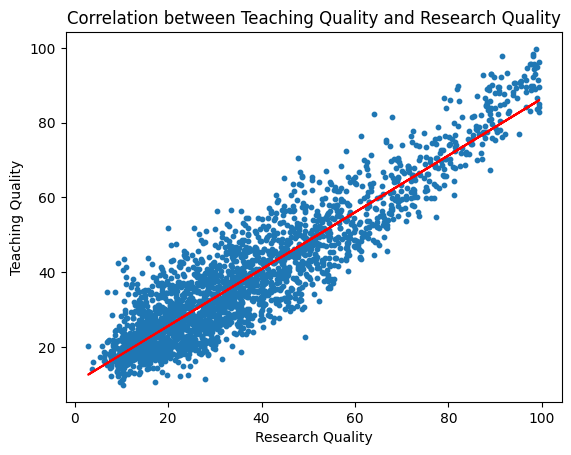

0.9156878893845481


In [6]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Downloads\timesData.csv")

df['teaching'] = pd.to_numeric(df['teaching'], errors='coerce')

df = df.dropna(subset=['teaching', 'international_students'])

df = df.drop_duplicates()

if df['teaching'].nunique() < 2 or df['international_students'].nunique() < 2:
    print("Not enough unique data for regression.")
else:
    # Prepare variables
    x = df['research']
    y = df['teaching']

    # Run linear regression
    slope, intercept, r, p, std_err = stats.linregress(x, y)

    # Regression function
    def myfunc(x):
        return slope * x + intercept

    # Create regression line
    mymodel = list(map(myfunc, x))

    # Plot scatter and regression line
    plt.scatter(x, y, s = 10)
    plt.plot(x, mymodel, color="red")
    plt.title("Correlation between Teaching Quality and Research Quality")
    plt.xlabel("Research Quality")
    plt.ylabel("Teaching Quality")
    plt.show()
    print(r)


Correlation between Research Quality and Citations

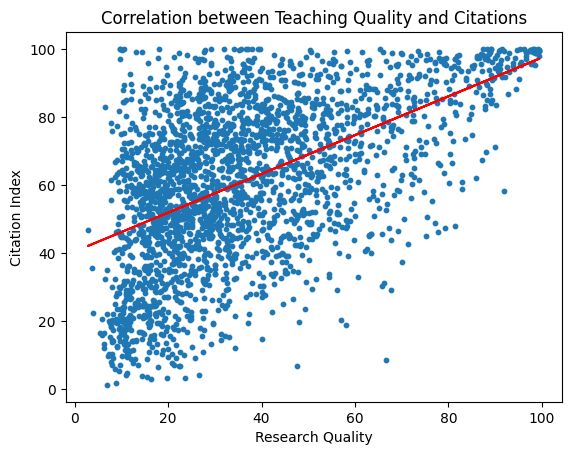

0.5252635615734139


In [8]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Downloads\timesData.csv")

df['teaching'] = pd.to_numeric(df['teaching'], errors='coerce')

df = df.dropna(subset=['teaching', 'citations'])

df = df.drop_duplicates()

x = df['research']
y = df['citations']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y, s = 10)
plt.plot(x, mymodel, color="red")
plt.title("Correlation between Teaching Quality and Citations")
plt.xlabel("Research Quality")
plt.ylabel("Citation Index")
plt.show()
print(r)


Multiple regression model for Research, Teaching and Citations Index

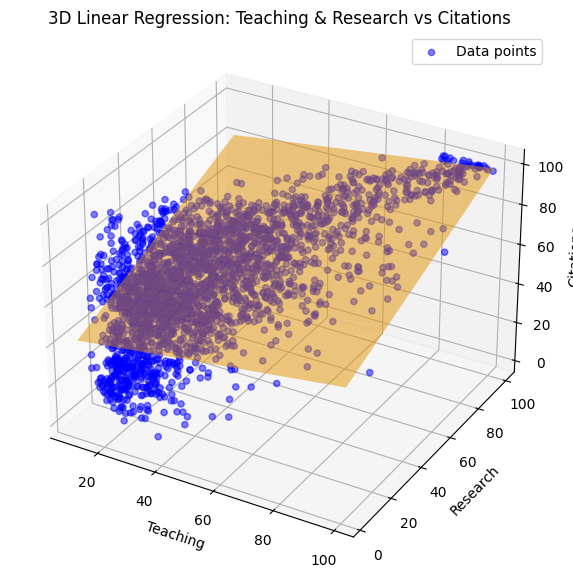

R² Score: 0.27943636708761843
Coefficients: [0.19112939 0.42565255]
Intercept: 38.411358712859425


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df.dropna(inplace = True)

df = pd.read_csv(r"D:\Downloads\timesData.csv")

X = df[['teaching', 'research']]
y = df['citations']

regr = linear_model.LinearRegression()
regr.fit(X, y)

# Creates 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['teaching'], df['research'], y, c='blue', marker='o', alpha=0.5, label='Data points')

# Create grid to plot regression plane
teaching_range = np.linspace(df['teaching'].min(), df['teaching'].max(), 20)
research_range = np.linspace(df['research'].min(), df['research'].max(), 20)
teaching_grid, research_grid = np.meshgrid(teaching_range, research_range)

grid_df = pd.DataFrame({
    'teaching': teaching_grid.ravel(),
    'research': research_grid.ravel()
})
predicted_citations = regr.predict(grid_df).reshape(teaching_grid.shape)

# Plot regression plane
ax.plot_surface(teaching_grid, research_grid, predicted_citations, color='orange', alpha=0.5)

# Labels
ax.set_xlabel('Teaching')
ax.set_ylabel('Research')
ax.set_zlabel('Citations')
ax.set_title('3D Linear Regression: Teaching & Research vs Citations')

plt.legend()
plt.show()

from sklearn.metrics import r2_score
y_pred = regr.predict(X)
print("R² Score:", r2_score(y, y_pred))

print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)

What this means

- A research coefficient of 0.43 compared to the teaching coefficient of 0.19 shows that Research Quality has a much larger impact than Teaching Quality on the Citation index

- A R-squared score of 0.28 means that only 28% of the variation in the citation indexes is explained by these two features, indicating that the citation index is influenced by other factors as well (e.g: funding, faculty size, international collaboration, etc.)

Model for how Teaching and Research influence the Total Score of an institution

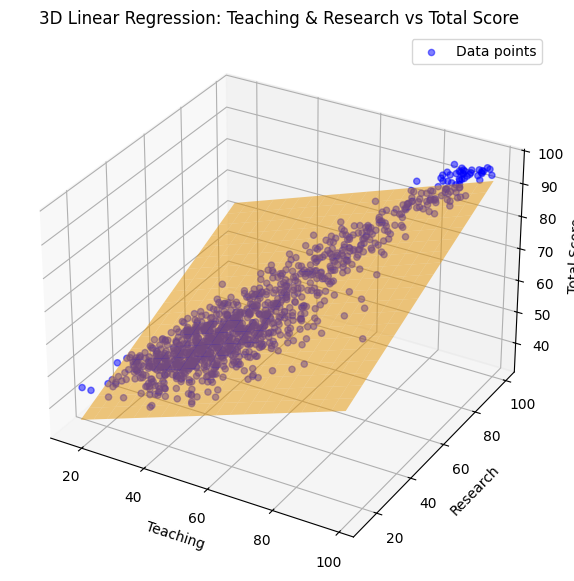

R² Score: 0.8614608162464495
Coefficients: [0.34549585 0.33002825]
Intercept: 25.270373570983864


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv(r"D:\Downloads\timesData.csv")

cols = ['teaching', 'research', 'total_score']
for col in cols:
    df[col] = pd.to_numeric(df[col].replace('-', np.nan), errors='coerce') #this converts all values to numerics
    
df.dropna(inplace = True) #this deletes rows with empty cells

X = df[['teaching', 'research']]
y = df['total_score']

regr = linear_model.LinearRegression() #creates lin regression model using scikit learn
regr.fit(X, y)

# Creates 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot regression plane
ax.plot_surface(teaching_grid, research_grid, predicted_totalscore, color='orange', alpha=0.5)

ax.scatter(df['teaching'], df['research'], y, c='blue', marker='o', alpha=0.5, label='Data points') #creates scatter plot

# Create grid to plot regression plane
teaching_range = np.linspace(df['teaching'].min(), df['teaching'].max(), 20)
research_range = np.linspace(df['research'].min(), df['research'].max(), 20)
teaching_grid, research_grid = np.meshgrid(teaching_range, research_range)

grid_df = pd.DataFrame({
    'teaching': teaching_grid.ravel(),
    'research': research_grid.ravel()
})
predicted_totalscore = regr.predict(grid_df).reshape(teaching_grid.shape)

# Labels
ax.set_xlabel('Teaching')
ax.set_ylabel('Research')
ax.set_zlabel('Total Score')
ax.set_title('3D Linear Regression: Teaching & Research vs Total Score')

plt.legend()
plt.show()

from sklearn.metrics import r2_score
y_pred = regr.predict(X)
print("R² Score:", r2_score(y, y_pred))

print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)

Results:

- A R-square score of 0.86 shows that 86% of the variance in the Total Score is caused by the Teaching and Research scores, meaning they have a significant impact on total score

- Teaching score (coeff = 0.345) has a slightly larger impact on Total Score than the Research Score (coeff = 0.33)